In this notebook I worked with the time frames data, from my sensor. I used the function, wchich I implemented on Raspberry Pi. 

In [37]:
from asyncio.log import logger
from datetime import datetime
from tkinter import messagebox
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
import matplotlib.pylab as plt
import logging
import time
import calendar
import string
import tkinter as tk
from numpy import isin
import numpy as np

In [38]:
class PlotData:
    def __init__(self) -> None:
        pass

    def format_date(
        self,
        selected_start_date,
        selected_start_time,
        selected_end_date,
        selected_end_time,
    ) -> list:

        start_date = "{} {}".format(selected_start_date, selected_start_time)
        end_date = "{} {}".format(selected_end_date, selected_end_time)

        times = [start_date, end_date]

        try:
            format_dates = [datetime.strptime(i, "%d/%m/%y %H:%M:%S") for i in times]
        except ValueError:
            format_dates = [datetime.strptime(i, "%m/%d/%y %H:%M:%S") for i in times]

        return format_dates

    def logging_err(self, type_err):

        if type_err == "data_plot_err":
            return logger.warn(
                logging.warning("{} Not selected data to plot".format(datetime.now()))
            )
        elif type_err == "hour_data_err":
            return logger.warn(
                logging.warning("{} Wrong format".format(datetime.now()))
            )

    def selected_values(self, selected_values):
        return selected_values

    @staticmethod
    def plot_chart(
        selected_start_date,
        selected_start_time,
        selected_end_date,
        selected_end_time,
        selected_vars,
    ):

        plt.close()

        plot = PlotData()

        filter_values = ["PM1", "PM2.5", "PM10", "temp", "pressure", "humidity"]

        bool_values = dict(zip(filter_values, plot.selected_values(selected_vars)))

        filtered_values = []

        filtered_values = [key for key, val in bool_values.items() if val == 1]

        logging.info(filtered_values)

        try:
            full_time = plot.format_date(
                selected_start_date,
                selected_start_time,
                selected_end_date,
                selected_end_time,
            )
        except ValueError:
            print("Hour Err".upper())
            plot.logging_err("hour_data_err")

        air_poll_df = pd.read_csv("air_pollution_smog_clear.csv", sep=",")
        air_poll_df.pop("entry_id")
        air_poll_df.groupby('PM1').mean()

        try:

            [pd.to_datetime(i) for i in full_time]

            start_date = full_time[0]
            end_date = full_time[1]
            air_poll_df["date"] = pd.to_datetime(air_poll_df["date"])
            plot_df = (air_poll_df["date"] >= start_date) & (
                air_poll_df["date"] <= end_date
            )
            plot_df_2 = air_poll_df.loc[plot_df]

            plt.rcParams["figure.figsize"] = [16.0, 6.0]
            plt.rcParams["figure.autolayout"] = True

            
            # # calculate the yearly average air temperature
            # plot_df_2['PM1',"PM2.5","PM10"] = df_temperature.mean(axis=1)

            # # drop columns containing monthly values
            # df_temperature = plot_df_2[['PM1',"PM2.5","PM10"]]
            
            # p.plot(range(20),range(20))
            try:
                plot_df_2.plot(x="date", y=filtered_values,)
                # plt.xticks(np.arange(0,151,25))
                plt.xticks(np.arange(0,520769,10))
                plt.suptitle(
                    "Wartości mierzone przez miernik w okresie\n{} Do {} ".format(
                        start_date, end_date
                    ).upper(),
                    fontsize=12,
                    color="black",
                )

                plt.xlabel("Data", fontsize=12, color="black")
                plt.ylabel("Wartości", fontsize=12, color="black")
                # plt.average(20,20,10)
                plt.show()
            except TypeError:
                print("No Data!".upper())
                plot.logging_err("data_plot_err")

                print(air_poll_df.head())

        except UnboundLocalError:
            pass


plot_vars_template = ["PM1", PM2.5, "PM10", "temp", "pressure", "humidity"]


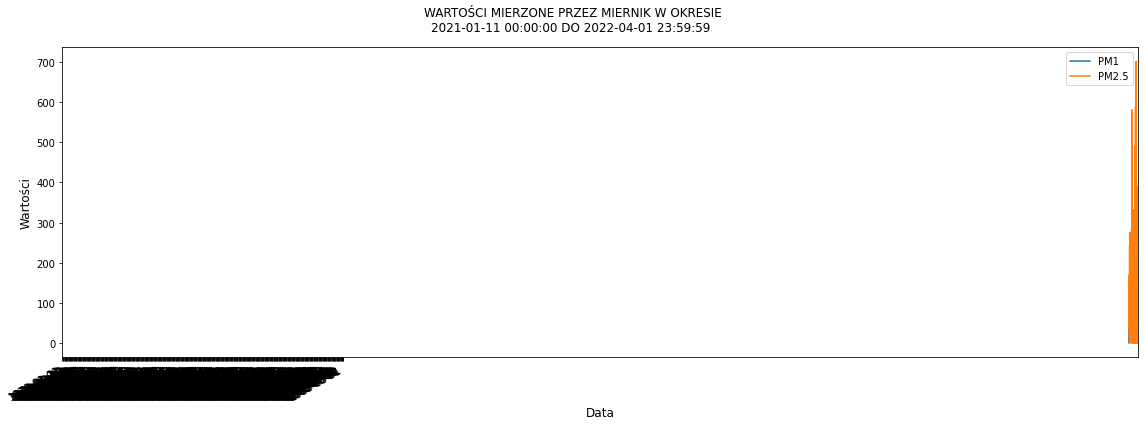

In [39]:
plot = PlotData()


def get_selected_vars(sel_vars):
    return [1 if isinstance(i, str) else 0 for i in sel_vars]


selected_start_date = "11/1/21"
selected_start_time = "00:00:00"
selected_end_date = "01/04/22"
selected_end_time = "23:59:59"
selected_vars = get_selected_vars(["PM1", "PM2.5", 0, 0, 0, 0])

plot.plot_chart(
    selected_start_date,
    selected_start_time,
    selected_end_date,
    selected_end_time,
    selected_vars,
)


# air_poll_df.groupby("PM1").mean()

<div class="alert alert-block alert-warning">
<b>Example:</b> Period of collect data from sensor:
inside code cells, or use for mathematical formulas if needed.
</div> 
<b>start:</b><t> 13/11/2022</t> <br>
<b>end:</b> <t>  01/04/2022</t> <br>

<b>NOVEMBER 2021</b> <br>
<b>start:</b>13/11/2022 <br>
<b>end:</b>  31/11/2022

November


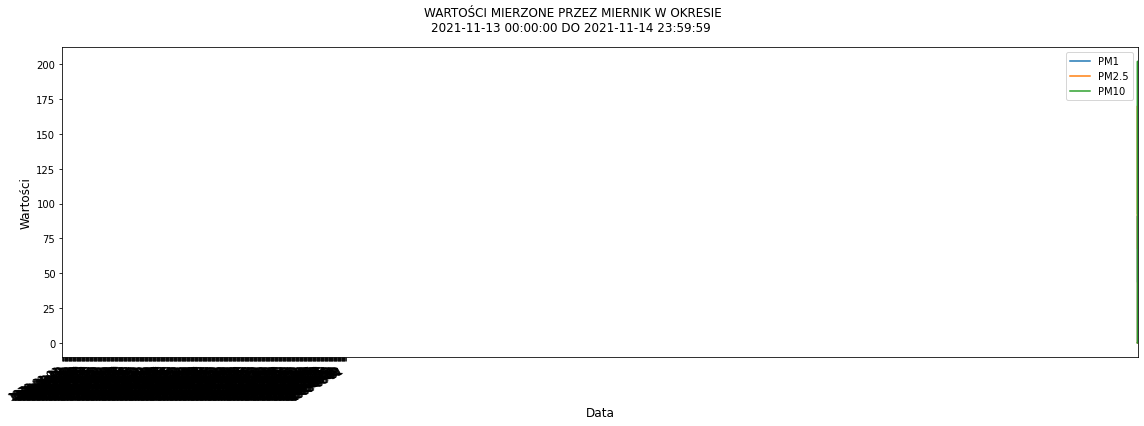

December


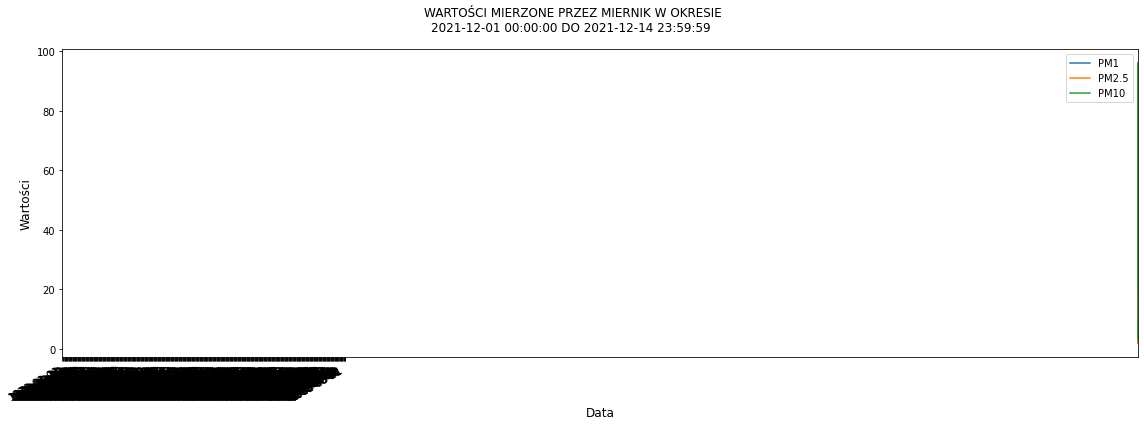

January


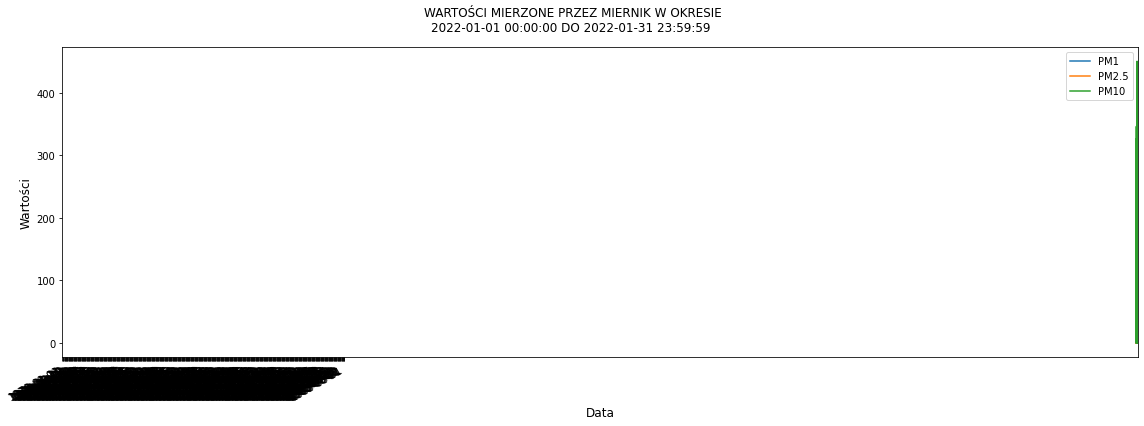

In [40]:
PLOT = PlotData()
def get_month(month: str):

    if month == "November":
        start_date = "13/11/21"
        end_date = f"{calendar.monthrange(2021, 11)[1]}/11/21"
        end_date = "14/11/21"
    elif month == "December":
        start_date = "01/12/21"
        # end_date = f"{calendar.monthrange(2021, 12)[1]}/12/21"
        end_date = "14/12/21"

    elif month == "January":
        start_date = "01/01/22"
        end_date = f"{calendar.monthrange(2022, 1)[1]}/01/22"

    elif month == "February":
        start_date = "01/02/2022"
        end_date = f"{calendar.monthrange(2022, 2)[1]}/02/22"

    elif month == "March":
        start_date = "01/03/2022"
        end_date = f"{calendar.monthrange(2022, 3)[1]}/03/22"

    return [start_date, end_date]


def get_month_start_end_hours():
    return ["00:00:00", "23:59:59"]


def plot_selected_month(month):
    print(month)

    start_date = get_month(month)[0]
    end_date = get_month(month)[1]
    start_time = get_month_start_end_hours()[0]
    end_time = get_month_start_end_hours()[1]

    PlotData.plot_chart(
        start_date,
        start_time,
        end_date,
        end_time,
        selected_vars = get_selected_vars(["PM1", "PM2.5", "PM10", 0, 0, 0])
    )


months = [
    "November",
    "December",
    "January",
    # "February",
    # "March",
]

for i in months:
    plot_selected_month(i)


In [41]:
PlotData.plot_chart("01/02/22", "00:00:00", "02/28/22", "23:59:59",["PM1"])

C:\Users\admin\AppData\Local\Temp\ipykernel_17320\4048824882.py:28: DeprecationWarning: The 'warn' method is deprecated, use 'warning' instead
  return logger.warn(


NO DATA!
                 date   PM1  PM2.5  PM10   temp    pressure  humidity
0 2021-11-12 20:30:17   0.0    0.0   0.0  26.47  1022.04517  39.31152
1 2021-11-12 20:30:35  22.0   33.0  38.0  26.67  1022.39905  39.24609
2 2021-11-12 20:30:52  23.0   35.0  44.0  26.69  1022.33557  39.18848
3 2021-11-12 20:31:10  25.0   39.0  48.0  26.71  1022.28021  39.74805
4 2021-11-12 20:31:41  24.0   38.0  45.0  26.73  1022.37970  39.12109
